## Реализовать обучение линейной регрессии для задачи boston house prices с использованием torch’а

In [232]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import torchvision
from torch.utils.data import TensorDataset, DataLoader

import warnings
warnings.filterwarnings('ignore')


In [233]:
# Загружаем данные
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']

data = pd.read_csv('housing.csv', delim_whitespace=True, names=names)

In [234]:
# Знакомимся с данными, смотрим статистики
data.head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4


In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [236]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [237]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [238]:
# выделяем целевую переменную
label = data['MEDV']
data.drop(['MEDV'], axis=1, inplace=True)

In [239]:
# разбиваем данные на train и test
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.3, random_state=42)

In [240]:
# нормируем данные
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [241]:
# преобразуем в tensor формат
torch_X_train = torch.Tensor(X_train_sc)
torch_X_test = torch.Tensor(X_test_sc)
torch_y_train = torch.Tensor(y_train.values)
torch_y_test = torch.Tensor(y_test.values)

In [242]:
# Задаем batch_size и готовим данные для итерации
batch_size = 16
train_dataset = TensorDataset(torch_X_train, torch_y_train )
test_dataset = TensorDataset(torch_X_test, torch_y_test)

train_iter = DataLoader(train_dataset, batch_size, shuffle=True)
test_iter = DataLoader(test_dataset, batch_size, shuffle=False)

In [243]:
# составляем модель
model = torch.nn.Sequential(torch.nn.Linear(13, 1))
loss = torch.nn.MSELoss(reduction='mean')
trainer = torch.optim.SGD(model.parameters(), lr=0.001)

In [244]:
# тренируем модель
model = torch.nn.Sequential(torch.nn.Linear(13, 1))
loss = torch.nn.MSELoss(reduction='mean')
trainer = torch.optim.SGD(model.parameters(), lr=0.001)

num_epochs = 50
for epoch in range(0, num_epochs):
    l = 0    
    
    model.train()
    for X, y in train_iter:
        trainer.zero_grad()
        l = loss(model.forward(X).reshape(-1), y)
        l.backward()
        trainer.step()
    l = loss(model.forward(torch_X_train).reshape(-1), torch_y_train)
        
    model.eval()
    for X, y in test_iter:
        trainer.zero_grad()
        l = loss(model.forward(X).reshape(-1), y)
        l.backward()
        trainer.step()
    l = loss(model.forward(torch_X_test).reshape(-1), torch_y_test)
    
    if epoch%10 == 0:
        print('loss: %f' % (l.item()))
        print('w', model[0].weight.data)
        print('b', model[0].bias.data)

loss: 467.903503
w tensor([[ 0.0552,  0.0650, -0.1907, -0.1251, -0.4245,  0.0674,  0.0760, -0.0473,
         -0.2999,  0.0068, -0.2417,  0.0059, -0.4185]])
b tensor([1.3505])
loss: 140.226807
w tensor([[-0.3858,  0.4954, -0.6922,  0.5048, -0.8662,  1.8021, -0.1389, -0.3835,
         -0.2852, -0.4260, -0.8403,  0.2457, -1.8850]])
b tensor([11.6801])
loss: 54.596600
w tensor([[-0.4646,  0.4891, -0.6638,  0.7586, -0.8621,  2.5558, -0.0612, -0.9240,
          0.0139, -0.4070, -1.0456,  0.4118, -2.5385]])
b tensor([17.0558])
loss: 31.080309
w tensor([[-0.5174,  0.4961, -0.5992,  0.9426, -0.8904,  3.0059,  0.0256, -1.3589,
          0.2568, -0.3757, -1.2728,  0.5554, -2.9982]])
b tensor([19.8954])
loss: 24.441690
w tensor([[-0.5557,  0.5470, -0.5678,  0.9031, -0.9641,  3.1603, -0.0091, -1.6381,
          0.4146, -0.3975, -1.4508,  0.6292, -3.1834]])
b tensor([21.3617])


In [245]:
# оценка на тестовых данных
with torch.no_grad():
    predict = model(torch_X_test)
    print(mean_squared_error(predict, torch.Tensor(y_test)))

22.506279


### Cравнение нашей линейной регресии с sklearn.linear_model.LinearRegression

In [246]:
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()
model_LR.fit(X_train_sc, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [247]:
# по умолчанию используется r2_score
model_LR.score(X_test_sc, y_test)

0.7112260057484932

In [248]:
# оценка mean_squared_error
predict_LR = model_LR.predict(X_test_sc)
mean_squared_error(predict_LR, y_test)

21.517444231177212

In [249]:
# Коэффициенты и смещение
print('Коэффициенты - ', model_LR.coef_)
print('Cмещение - ', model_LR.intercept_)

Коэффициенты -  [-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]
Cмещение -  23.01581920903955


<!-- Выводы:
результаты модели на torch сопоставимы с результатами модели LinearRegression из sklearn:
    22.922598 в нашей модели, 21.517444 в моделе из sklearn, модель из sklearn точнее.
коэфиициенты и смещение, сопоставимы:
    коэффициенты нашей модели: 
        [-0.5607,  0.4867, -0.5716,  0.8749, -0.6550,  3.2867, -0.2226, -1.5385,
          0.3287, -0.3973, -1.3741,  0.6638, -3.0371]
    коэффициенты модели из sklearn:
        [-1.1083,  0.8084,  0.3431,  0.8138, -1.7980,  2.9138, -0.2989, -2.9425,
        2.0941, -1.4470, -2.0523,  1.0237, -3.8857] -->
    

#### Выводы:

In [250]:
print('Mean squared error нашей модели: ', mean_squared_error(predict, torch.Tensor(y_test)))
print('Mean squared error модели из sklearn: ', mean_squared_error(predict_LR, y_test))

Mean squared error нашей модели:  22.506279
Mean squared error модели из sklearn:  21.517444231177212


Коэффицинеты моделей похожи, но не одинаковые:

In [251]:
print('Коэффициенты из нашей модели: ', model[0].weight.data.numpy()[0])
print('Коэффициенты модели из sklearn: ', model_LR.coef_)
print('\n')

print('Смещение из нашей модели: ', model[0].bias.data.item())
print('Смещение модели из sklearn: ',  model_LR.intercept_) 

Коэффициенты из нашей модели:  [-0.5761382   0.58172244 -0.53916776  0.855652   -1.0373898   3.2296941
 -0.00815739 -1.8486702   0.5410825  -0.41733304 -1.572128    0.6850489
 -3.3067524 ]
Коэффициенты модели из sklearn:  [-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


Смещение из нашей модели:  22.085590362548828
Смещение модели из sklearn:  23.01581920903955


## Реализовать наивный баесовский классификатор для MNIST (взяв всего 2 цифры “1” и “2”) сравнить с sclearn’овски

In [252]:
def transform(data):
    data = torch.tensor(data.getdata(), dtype=torch.float32)
    return torch.floor(data / 128.).squeeze(axis=-1)

In [253]:
mnist_train = torchvision.datasets.MNIST('.', train=True, transform=transform, download=True)
mnist_test  = torchvision.datasets.MNIST('.', train=False, transform=transform, download=True)

In [254]:
# выберем строки с меткой 1 и 0
train_x = [mnist_train[i][0]  for i in range(len(mnist_train)) if (mnist_train[i][1] == 0) or (mnist_train[i][1] == 1) ]
test_x = [mnist_test[i][0]  for i in range(len(mnist_test)) if (mnist_test[i][1] == 0) or (mnist_test[i][1] == 1) ]
train_y = [mnist_train[i][1]  for i in range(len(mnist_train)) if (mnist_train[i][1] == 0) or (mnist_train[i][1] == 1) ]
test_y = [mnist_test[i][1]  for i in range(len(mnist_test)) if (mnist_test[i][1] == 0) or (mnist_test[i][1] == 1) ]

In [255]:
print(len(train_x))
print(len(test_x))

12665
2115


In [256]:
training_tensor = torch.cat([i for i in train_x], dim=0).reshape(len(train_x), 784)
testing_tensor = torch.cat([i for i in test_x], dim=0).reshape(len(test_x), 784)

In [257]:
y_train = torch.tensor(train_y)
y_test = torch.tensor(test_y)

$$ P(pix) =  \frac{Количество\: вхождений\: ненулевых\: пикселей\: pix\: в\: датасет}  {Количество\: пикселей\: в\: датасете} $$

In [258]:
p_pix = training_tensor.sum(axis=0) / training_tensor.sum()
p_pix.shape

torch.Size([784])

$$ P(pix|one) =  \frac {Количество\: вхождений\: ненулевых\: пикселей\: pix\: в\: картинках\: с\: единицей}  {Количество\: пикселей \:в\: картинках\: с\: единицей} $$

In [259]:
one_training_tensor = training_tensor[y_train == 1]
p_pix_one = one_training_tensor.sum(axis=0)/ one_training_tensor.sum()

$$ P(pix) =  \frac {Количество\: картинок\: единиц}  {Количество\: картинок} $$

In [260]:
p_one =(y_train == 1).sum().item() / len(y_train)
p_not_one = (y_train == 0).sum().item() / len(y_train)
print(p_one)
print(p_not_one) # zero

0.5323332017370707
0.46766679826292934


#### можно посмотреть картинку

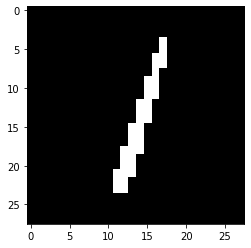

In [261]:
plt.imshow(testing_tensor[0].numpy().reshape(28, 28), cmap='gray');

$$ P(one|pix) =  \frac {P(pix|one)P(one)}  {P(pix)} $$

$$ P(one|pix) =  \frac {P(pix_1|one)P(pix_2|one)...P(pix_n|one)P(one)}  {P(pix_1)P(pix_2)...P(pix_n)} $$

In [262]:
np.log((test_sample * p_pix_one)[test_sample != 0]).sum()  * np.log(p_one) 

tensor(113.3201)

In [263]:
# логарифм - чтоб брать сумму, а не произведение.
test_sample = testing_tensor[0]
(np.log((test_sample * p_pix_one)[test_sample != 0]).sum() + np.log(p_one))/ np.log((test_sample * p_pix)[test_sample != 0]).sum()

tensor(0.8756)

In [264]:
# ручная калибровка

def nbc_test(test_sample, p_pix_one, p_one, p_pix):
    pred = (np.log((test_sample * p_pix_one)[test_sample != 0]).sum() + np.log(p_one)) / np.log((test_sample * p_pix)[test_sample != 0]).sum()
    return pred

pred_1 = []
for i in training_tensor[y_train == 1]:
    pred_1.append(nbc_test(i, p_pix_one, p_one, p_pix))
    
print(np.array(pred_1).max())

pred = []
for i in training_tensor[y_train == 0]:
    pred.append(nbc_test(i, p_pix_one, p_one, p_pix))
    
print(np.array(pred).min())

1.1711272
0.9510283


In [265]:
x1 = np.array(pred_1).max()
x2 = np.array(pred).min()
(x1+x2)/2

1.0610777139663696

### проверка на тестовых данных

In [266]:
def nbc(test_sample, p_pix_one, p_one, p_pix):
    pred = (np.log((test_sample * p_pix_one)[test_sample != 0]).sum() + np.log(p_one)) / np.log((test_sample * p_pix)[test_sample != 0]).sum()
    if pred < 1.1: # значение подобрано вручную, выше    
        return 1
    else:
        return 0

In [267]:
pred = []
for i in testing_tensor:
    pred.append(nbc(i, p_pix_one, p_one, p_pix))

In [268]:
# оценка
from sklearn.metrics import accuracy_score
accuracy_score(pred, y_test)

0.9947990543735225

### Cравнение с  sklearn.naive_bayes.GaussianNB

In [269]:
from sklearn.naive_bayes import GaussianNB

In [270]:
model = GaussianNB()
model.fit(training_tensor, train_y )
predict = model.predict(testing_tensor)

accuracy_score(predict, test_y)

0.992434988179669

## Выводы

####  PS: